# LSTM

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("/content/AMZN.csv") 
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [ ]:
x_train = train[["Open"]]

In [ ]:
from sklearn.preprocessing import StandardScaler 
 
sc = StandardScaler() 
 
sc_x_train = sc.fit_transform(x_train)

In [ ]:
sc_x_train

array([[-0.88968649],
       [-0.89075397],
       [-0.89586134],
       ...,
       [ 1.31945839],
       [ 1.35954289],
       [ 1.43793273]])

In [ ]:
def feature_transform(n_steps, data):
  x = [] 
  y = [] 
  for i in range(n_steps, len(data)):
    x.append(data[i-n_steps:i, 0])
    y.append(data[i, 0])
  return np.array(x), np.array(y)

In [ ]:
n_steps = 12

In [ ]:
x_train, y_train = feature_transform(n_steps, sc_x_train)

In [ ]:
x_train.shape, y_train.shape

((1246, 12), (1246,))

In [ ]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

In [ ]:
x_train.shape

(1246, 12, 1)

In [ ]:
from keras.models import Sequential 
from keras.layers import LSTM, Dense 
 
model = Sequential() 
 
model.add(LSTM(200, activation = 'relu', input_shape = (n_steps, 1))) 
 
model.add(Dense(1)) 
 
model.compile(loss = 'mean_squared_error' , optimizer = 'adam') 
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 30)

Epoch 1/100
42/42 [==============================] - 2s 21ms/step - loss: 0.3941
Epoch 2/100
42/42 [==============================] - 1s 20ms/step - loss: 0.0078
Epoch 3/100
42/42 [==============================] - 1s 20ms/step - loss: 0.0062
Epoch 4/100
42/42 [==============================] - 1s 20ms/step - loss: 0.0052
Epoch 5/100
42/42 [==============================] - 1s 21ms/step - loss: 0.0041
Epoch 6/100
42/42 [==============================] - 1s 21ms/step - loss: 0.0039
Epoch 7/100
42/42 [==============================] - 1s 21ms/step - loss: 0.0034
Epoch 8/100
42/42 [==============================] - 1s 21ms/step - loss: 0.0036
Epoch 9/100
42/42 [==============================] - 1s 21ms/step - loss: 0.0049
Epoch 10/100
42/42 [==============================] - 1s 20ms/step - loss: 0.0031
Epoch 11/100
42/42 [==============================] - 1s 21ms/step - loss: 0.0041
Epoch 12/100
42/42 [==============================] - 1s 21ms/step - loss: 0.0033
Epoch 13/100
42/42 [=====

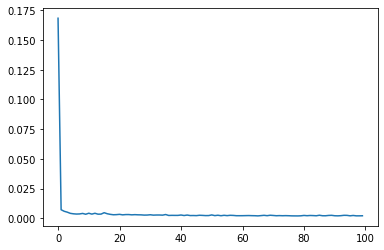

In [ ]:
plt.plot(history.history["loss"]) 
plt.show()

In [ ]:
test = pd.read_csv("/content/AMZNtrain.csv")
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [ ]:
x_test = test[["Open"]]
 
sc_x_test = sc.fit_transform(x_test)

In [ ]:
x_test, y_test = feature_transform(n_steps, sc_x_test)

In [ ]:
x_test.shape, y_test.shape

((1246, 12), (1246,))

In [ ]:
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
predictions = sc.inverse_transform(y_pred)

In [ ]:
predictions

array([[ 400.1112 ],
       [ 405.67517],
       [ 410.84326],
       ...,
       [1381.4967 ],
       [1440.0593 ],
       [1476.6528 ]], dtype=float32)

In [ ]:
actual = sc.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
actual

array([[ 403.      ],
       [ 408.      ],
       [ 401.      ],
       ...,
       [1454.199951],
       [1473.349976],
       [1510.800049]])

In [ ]:
from sklearn.metrics import mean_squared_error 
 
mse = mean_squared_error(actual, predictions) 
 
rmse = np.sqrt(mse) 
 
print("Mean Squared Error : ", mse)
print("Root Mean Squared Error : ", rmse)

Mean Squared Error :  457.11098262722203
Root Mean Squared Error :  21.380153943019728


 # GRU

In [ ]:
from keras.layers import GRU,Dense
from keras.models import Sequential
 
model=Sequential()
 
model.add(GRU(200,activation='relu',input_shape=(n_steps,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 200)               121800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 122,001
Trainable params: 122,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 30)

Epoch 1/100
42/42 [==============================] - 2s 18ms/step - loss: 0.4911
Epoch 2/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0043
Epoch 3/100
42/42 [==============================] - 1s 19ms/step - loss: 0.0027
Epoch 4/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0027
Epoch 5/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0030
Epoch 6/100
42/42 [==============================] - 1s 17ms/step - loss: 0.0025
Epoch 7/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0025
Epoch 8/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0023
Epoch 9/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0032
Epoch 10/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0024
Epoch 11/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0025
Epoch 12/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0022
Epoch 13/100
42/42 [=====

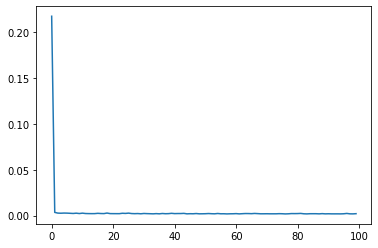

In [ ]:
plt.plot(history.history["loss"]) 
plt.show()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
predictions = sc.inverse_transform(y_pred)

In [ ]:
predictions

array([[ 395.0064],
       [ 403.5477],
       [ 408.9341],
       ...,
       [1384.3668],
       [1459.148 ],
       [1486.2688]], dtype=float32)

In [ ]:
actual = sc.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
actual

array([[ 403.      ],
       [ 408.      ],
       [ 401.      ],
       ...,
       [1454.199951],
       [1473.349976],
       [1510.800049]])

In [ ]:
from sklearn.metrics import mean_squared_error 
 
mse = mean_squared_error(actual, predictions) 
 
rmse = np.sqrt(mse) 
 
print("Mean Squared Error : ", mse)
print("Root Mean Squared Error : ", rmse)

Mean Squared Error :  440.566794594283
Root Mean Squared Error :  20.989683051306017
